# Part 1: Obtaining the Data 
***

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.read_csv('job.csv')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

# Part 2: Cleaning the Data 
***

*Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.*

In [4]:
# Check to see if there are any missing values in our data set
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level':'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours':'averageMonthlyHours',
                        'time_spend_company':'yearsAtCompany',
                        'Work_accident':'workAccident',
                        'promotion_last_5years':'promotion',
                        'Department' : 'department',
                        'left' : 'turnover'
                        })

# Part 3: Exploring the Data

## Statistical Overview 
***
The dataset has:
 - About 15,000 employee observations and 10 features 
 - The company had a turnover rate of about 24%
 - Mean satisfaction of employees is 0.61

In [6]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [7]:
# Check the type of our features. 
df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
department              object
salary                  object
dtype: object

In [8]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this left ratio
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

turnover
0    0.761917
1    0.238083
Name: count, dtype: float64

In [9]:
# Display the statistical overview of the employees
df.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
# Filter numeric columns
numeric_df = df.select_dtypes(include='number')

# Group by 'turnover' and calculate the mean
turnover_Summary = numeric_df.groupby(df['turnover']).mean()
turnover_Summary

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
turnover,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


## Correlation Matrix & Heatmap
***
**Moderate Positively Correlated Features:** 
- projectCount vs evaluation: 0.349333
- projectCount vs averageMonthlyHours:  0.417211
- averageMonthlyHours vs evaluation: 0.339742

**Moderate Negatively Correlated Feature:**
 - satisfaction vs turnover:  -0.388375


**Summary:**

From the heatmap, there is a **positive(+)** correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly. 

For the **negative(-)** relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied. 

In [11]:
numeric_df

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


<Axes: >

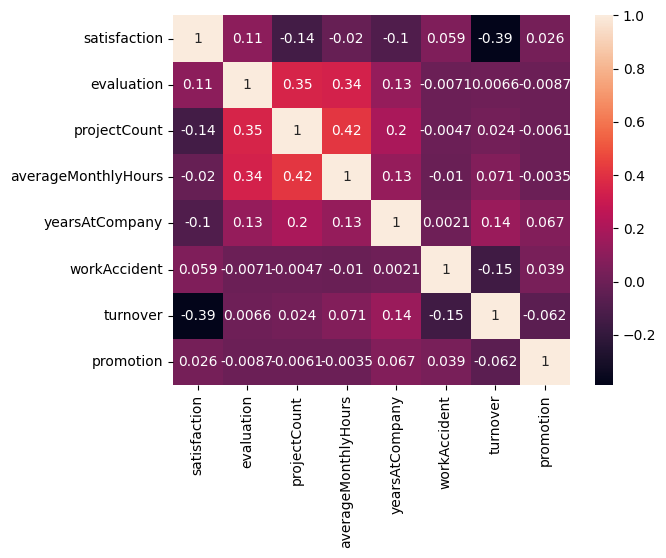

In [12]:
#Correlation Matrix

sns.heatmap(numeric_df.corr(), 
            xticklabels=numeric_df.columns.values,
            yticklabels=numeric_df.columns.values,
            annot=True)

##  Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)
***
**Summary:** Let's examine the distribution on some of the employee's features. Here's what I found:
 - **Satisfaction** - There is a huge spike for employees with low satisfaction and high satisfaction.
 - **Evaluation** - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
 - **AverageMonthlyHours** - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
 - The evaluation and average monthly hour graphs both share a similar distribution. 
 - Employees with lower average monthly hours were evaluated less and vice versa.
 - If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.
 

In [13]:
import warnings
warnings.filterwarnings("ignore")

Text(0, 0.5, 'Employee Count')

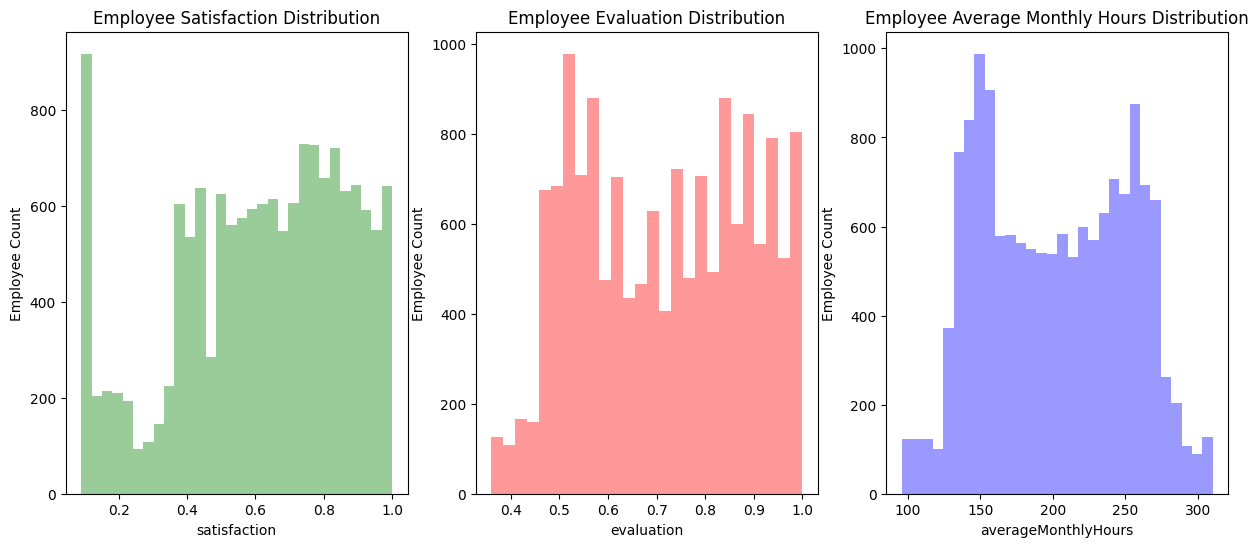

In [14]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

##   Salary V.S. Turnover
***
**Summary:** This is not unusual. Here's what I found:
 - Majority of employees who left either had **low** or **medium** salary.
 - Barely any employees left with **high** salary
 - Employees with low to average salaries tend to leave the company.
 

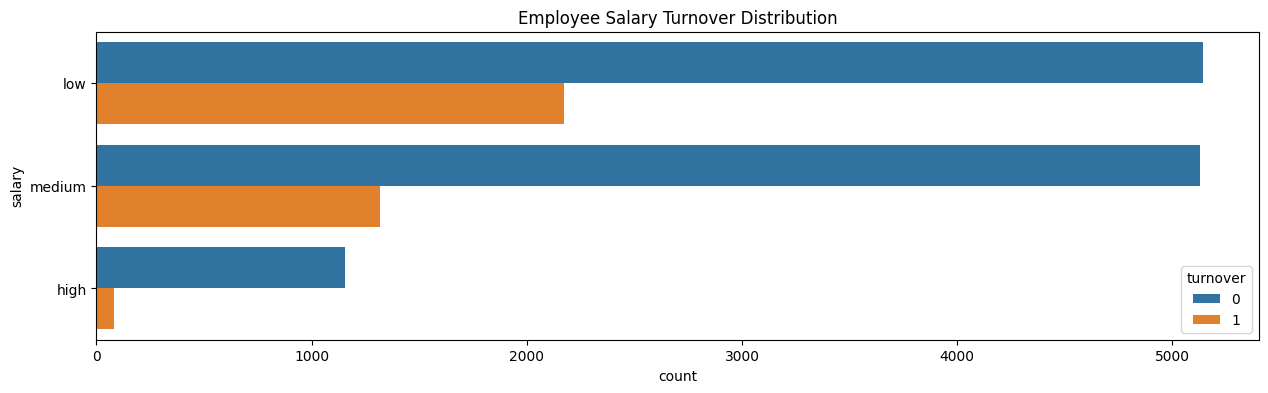

In [15]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

##  Department V.S. Turnover 
***
**Summary:** Let's see more information about the departments. Here's what I found:
 - The **sales, technical, and support department** were the top 3 departments to have employee turnover
 - The management department had the smallest amount of turnover
 

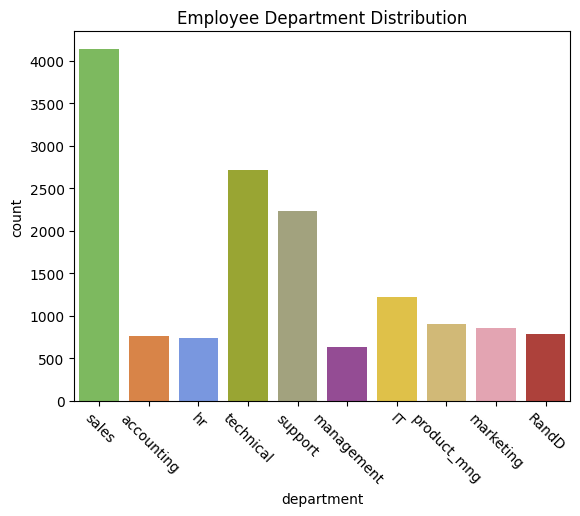

In [16]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution')
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.show()

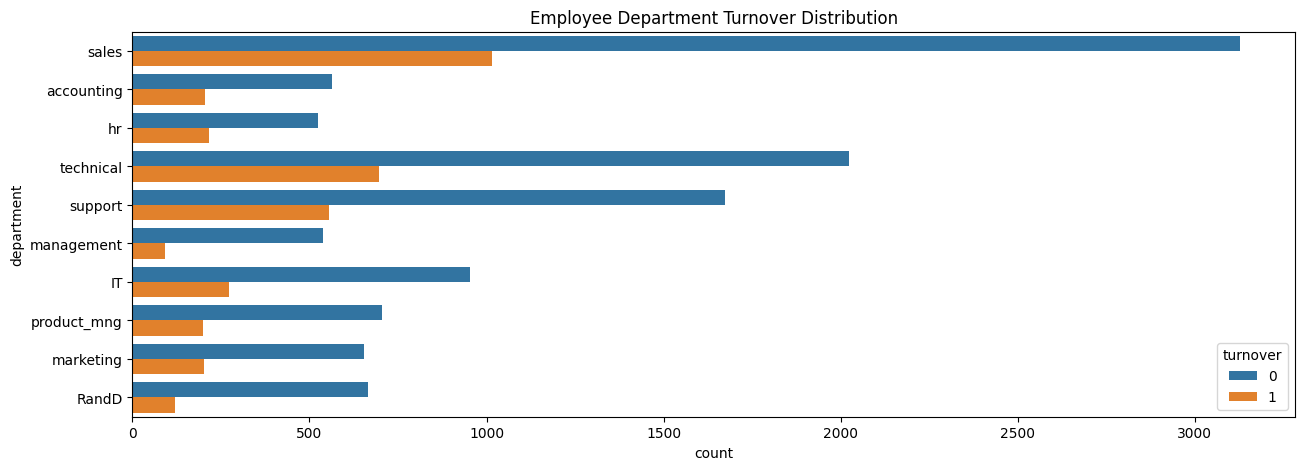

In [17]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

##  Turnover V.S. ProjectCount 
***
**Summary:** This graph is quite interesting as well. Here's what I found:
 - More than half of the employees with **2,6, and 7** projects left the company
 - Majority of the employees who did not leave the company had **3,4, and 5** projects
 - All of the employees with **7** projects left the company
 - There is an increase in employee turnover rate as project count increases
 



[Text(0, 0.5, 'Percent')]

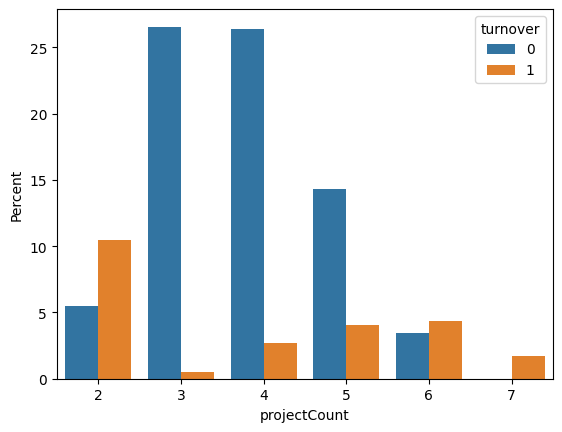

In [18]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

##  Turnover V.S. Evaluation 
***
**Summary:** 
 - There is a biomodal distribution for those that had a turnover. 
 - Employees with **low** performance tend to leave the company more
 - Employees with **high** performance tend to leave the company more
 - The **sweet spot** for employees that stayed is within **0.6-0.8** evaluation

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

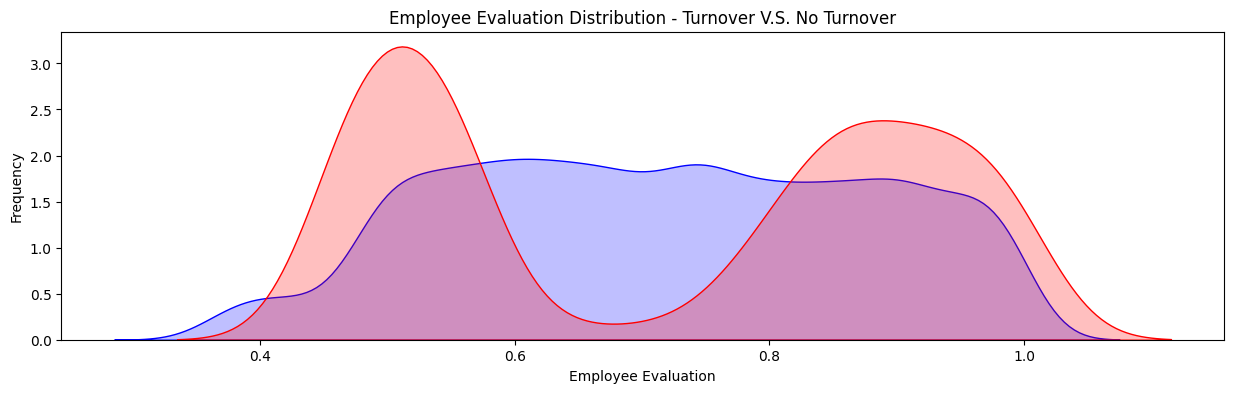

In [19]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

##  Turnover V.S. AverageMonthlyHours 
***
**Summary:** 
 - Another bi-modal distribution for employees that turnovered 
 - Employees who had less hours of work **(~150hours or less)** left the company more
 - Employees who had too many hours of work **(~250 or more)** left the company 
 - Employees who left generally were **underworked** or **overworked**.

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

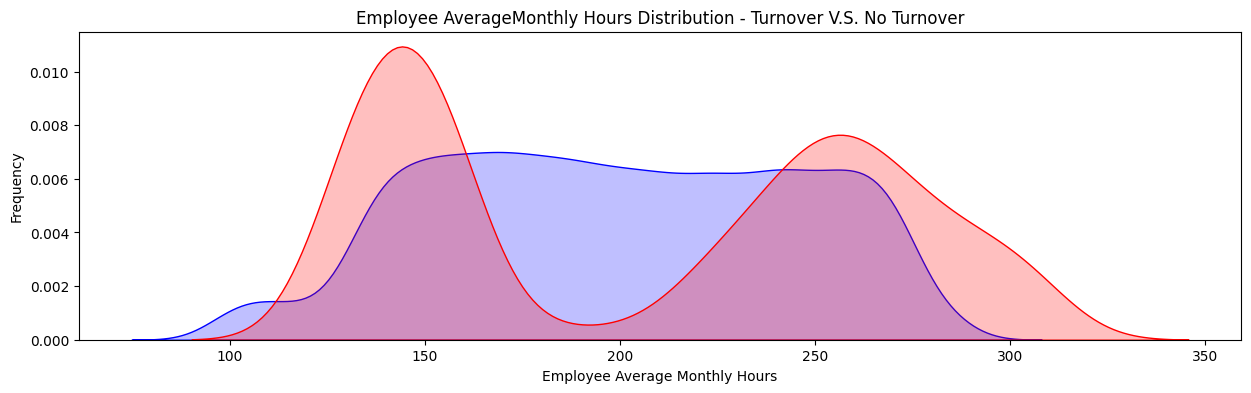

In [20]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

##  Turnover V.S. Satisfaction 
***
**Summary:** 
 - There is a **tri-modal** distribution for employees that turnovered
 - Employees who had really low satisfaction levels **(0.2 or less)** left the company more
 - Employees who had low satisfaction levels **(0.3~0.5)** left the company more
 - Employees who had really high satisfaction levels **(0.7 or more)** left the company more

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

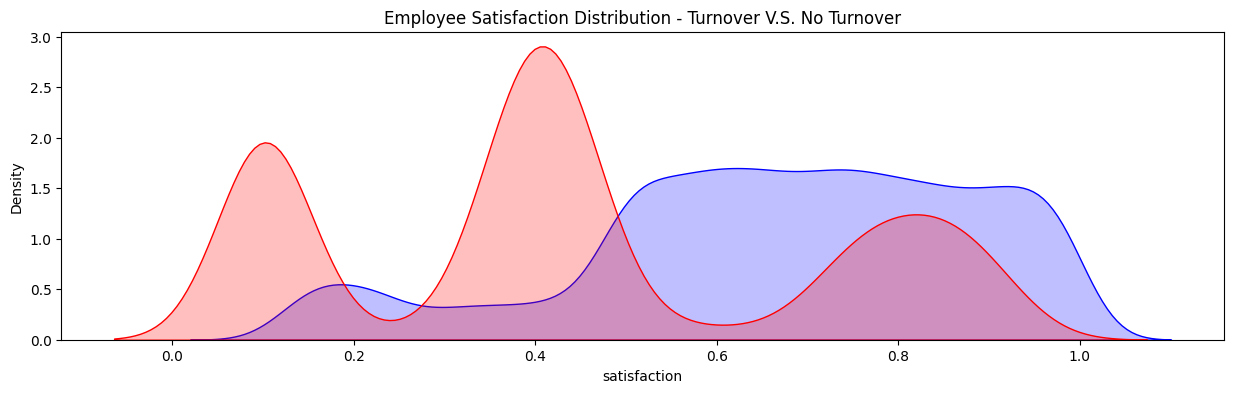

In [21]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

##  ProjectCount VS AverageMonthlyHours 
***

**Summary:**
 - As project count increased, so did average monthly hours
 - Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not. 
 - Looks like employees who **did not** have a turnover had **consistent** averageMonthlyHours, despite the increase in projects
 - In contrast, employees who **did** have a turnover had an increase in averageMonthlyHours with the increase in projects


<Axes: xlabel='projectCount', ylabel='averageMonthlyHours'>

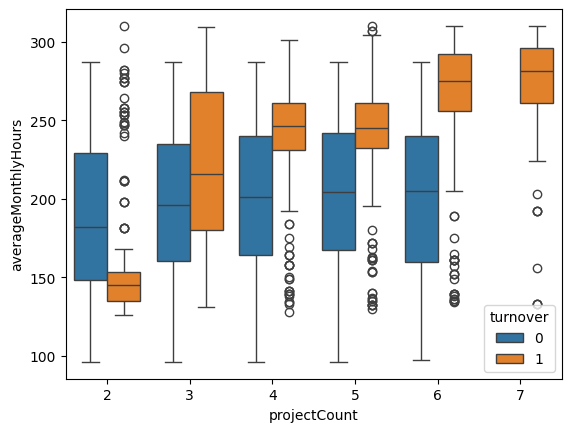

In [22]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

##  ProjectCount VS Evaluation
***
**Summary:** This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There is an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts. 

<Axes: xlabel='projectCount', ylabel='evaluation'>

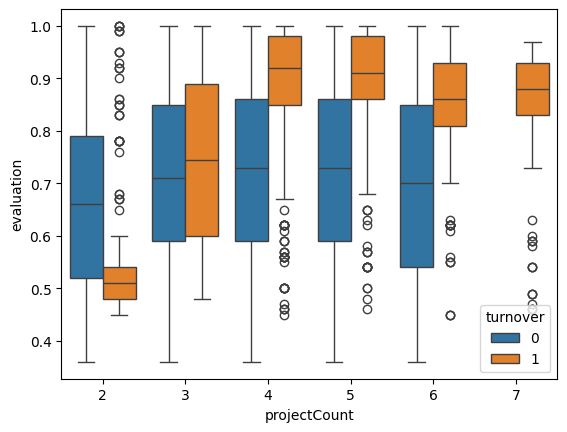

In [23]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

##  Satisfaction VS Evaluation
***
**Summary:** This is by far the most compelling graph. This is what I found:
 - There are **3** distinct clusters for employees who left the company
 
**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job. 
 - **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
 - **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. 

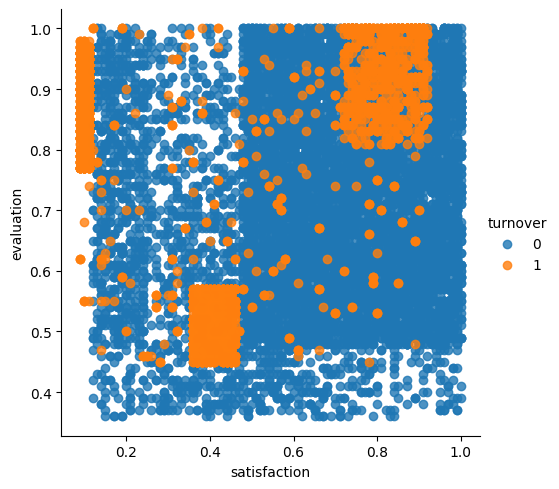

In [24]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

##  Turnover V.S. YearsAtCompany 
***
**Summary:** Let's see if theres a point where employees start leaving the company. Here's what I found:
 - More than half of the employees with **4 and 5** years left the company
 - Employees with **5** years should **highly** be looked into 
 

[Text(0, 0.5, 'Percent')]

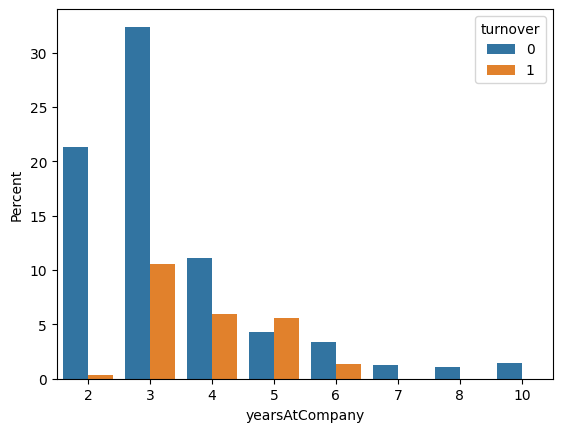

In [25]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

# Feature Importance
***
**Summary:**

By using a decision tree classifier, it could rank the features used for the prediction. The top three features were employee satisfaction, yearsAtCompany, and evaluation. This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we utilize less features. 

**Top 3 Features:**
1. Satisfaction
2. YearsAtCompany
3. Evaluation


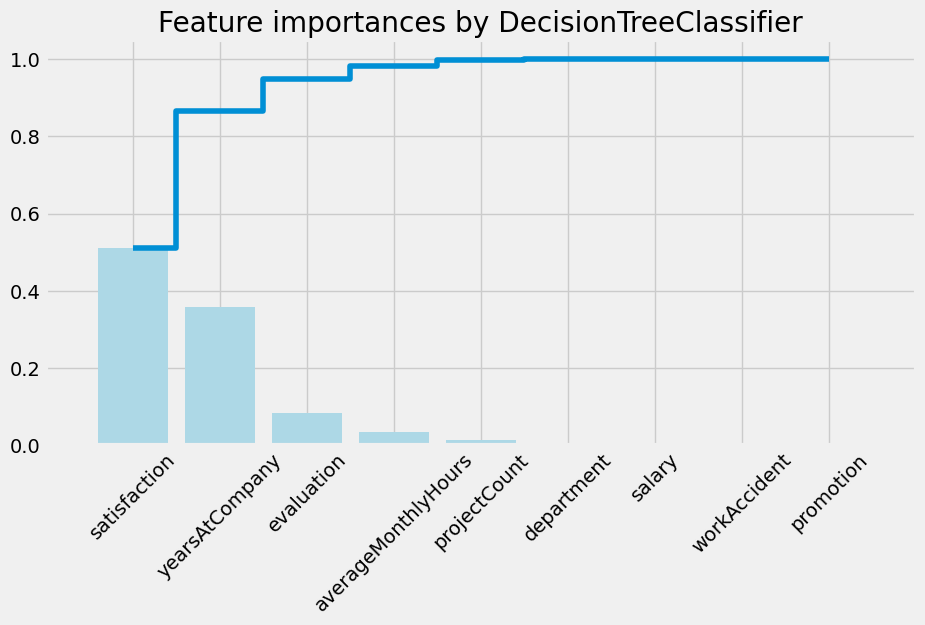

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation=45,fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

department
7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
Name: count, dtype: int64

# Logistic Regression Analysis



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train.head()
#

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
9838,1.00,0.61,3,188,4,0,0,6,1
7689,0.16,0.78,4,196,5,0,0,9,0
6557,0.80,0.80,3,175,2,0,0,1,2
6872,0.66,0.86,4,112,6,0,0,2,2
820,0.11,0.93,7,284,4,0,0,9,1


#  Using Other Models
***
**NOTE:** I'll be using four other models in this section to measure the accuracy of the different models

 The best model performance out of the four (Decision Tree Model, AdaBoost Model, Logistic Regression Model, Random Forest Model) was **Random Forest**! 

**Note: Evaluating the Model**
***
**Precision and Recall / Class Imbalance**

This dataset is an example of a class imbalance problem because of the skewed distribution of employees who did and did not leave. More skewed the class means that accuracy breaks down. 

In this case, evaluating our model’s algorithm based on **accuracy** is the **wrong** thing to measure. We would have to know the different errors that we care about and correct decisions. Accuracy alone does not measure an important concept that needs to be taken into consideration in this type of evaluation: **False Positive** and **False Negative** errors. 

**False Positives (Type I Error)**: You predict that the employee will leave, but do not

**False Negatives (Type II Error)**: You predict that the employee will not leave, but does leave


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler


In [29]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.76


In [30]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10,shuffle=True)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.815 (0.011)


## Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model
***

In [31]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))



 ---Logistic Model---
Logistic AUC = 0.76
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      2294
           1       0.48      0.77      0.59       706

    accuracy                           0.75      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.81      0.75      0.77      3000



 ---Decision Tree Model---
Decision Tree AUC = 0.94
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2294
           1       0.91      0.91      0.91       706

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



 ---Random Forest Model---
Random Forest AUC = 0.97
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2294
           1       0.99      0.94      0.97       706

    accuracy                  

## ROC Graph
***

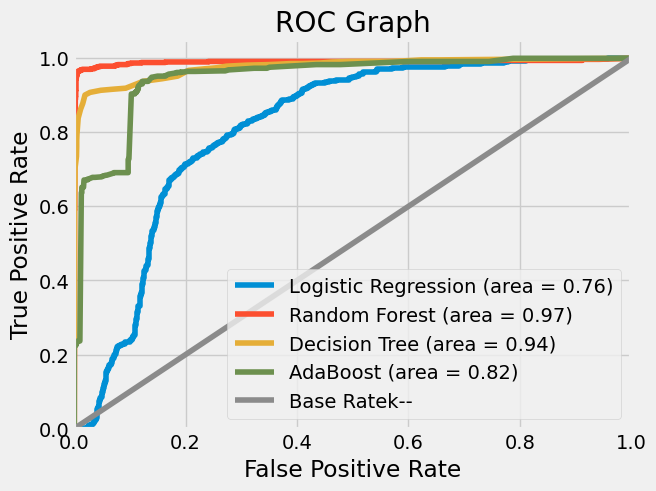

In [32]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# 5. Interpreting the Data
***

**Summary:** 
With all of this information get information why employees probably left:
 1. Employees generally left when they are **underworked** (less than 150hr/month or 6hr/day)
 2. Employees generally left when they are **overworked** (more than 250hr/month or 10hr/day)
 3. Employees with either **really high or low evaluations** should be taken into consideration for high turnover rate
 4. Employees with **low to medium salaries** are the bulk of employee turnover
 5. Employees that had **2,6, or 7 project count** was at risk of leaving the company
 6. Employee **satisfaction** is the highest indicator for employee turnover.
 7. Employee that had **4 and 5 yearsAtCompany** should be taken into consideration for high turnover rate
 8. Employee **satisfaction**, **yearsAtCompany**, and **evaluation** were the three biggest factors in determining turnover.